In [1]:
import read_data
import numpy as np

(calls, allbases, demands, times, calls_latlong) = read_data.populate_data()
allbases = np.delete(np.array(allbases), 2, 1)
demands = np.delete(np.array(demands), 2, 1)
times = np.array(times)
calls_latlong = np.array(calls_latlong)

ind = np.random.randint(0, allbases.shape[0], 8)
bases = allbases[ind,:]
points = np.delete(allbases, ind, 0)

distance = times[ind,:]

In [2]:
from matplotlib import pyplot as plt

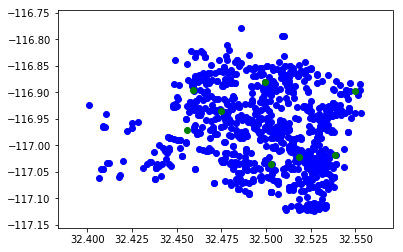

In [3]:
plt.figure()
plt.scatter(points[:,0],points[:,1], c='b')
plt.scatter(bases[:,0],bases[:,1], c='g')
plt.show()

In [4]:
r1 = 1266
r1_coverage = np.any(distance < r1, 0)
r1_covered = np.nonzero(r1_coverage)
r1_exposed = np.nonzero(np.logical_not(r1_coverage))

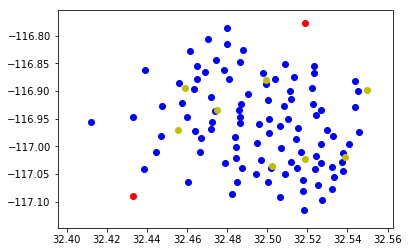

In [5]:
plt.figure()
plt.scatter(demands[r1_covered,0],demands[r1_covered,1], c='b')
plt.scatter(demands[r1_exposed,0],demands[r1_exposed,1], c='r')
plt.scatter(bases[:,0],bases[:,1], c='y')
plt.show()

In [6]:
np.max(np.min(distance, 0))

1507.0

In [7]:
ambulances = np.array([[1/4,1/4,1/4,1/4],[1/3,0,1/3,1/3]]).dot(bases[[0,3,5,7],:]) 
ambulances

array([[  32.50269825, -116.9270395 ],
       [  32.48701467, -116.93693733]])

In [8]:
np.argmin(np.sqrt((demands[:,0]-ambulances[0,0])**2+(demands[:,1]-ambulances[0,1])**2))

46

In [9]:
[np.argmin(np.sqrt((bases[:,0]-ambulances[i,0])**2+(bases[:,1]-ambulances[i,1])**2)) for i in range(ambulances.shape[0])]

[1, 1]